In [1]:
import pandas as pd 
편의점=pd.read_csv("c:/data/project/team/revised/머신러닝용.csv",encoding='cp949',index_col=0) 

In [2]:
편의점.columns

Index(['상권코드', '시군구명', '상권코드명', '유사업종점포수', '개업율1', '폐업률1', '개업점포수', '폐업점포수',
       '집객시설수', '극장수', '버스터미널수', '버스정거장수', '지하철역수', '숙박시설수', '대학교수',
       '연령대10유동인구수', '연령대20유동인구수', '연령대30유동인구수', '연령대40유동인구수', '연령대50유동인구수',
       '연령대60이상유동인구수', '총직장인구수', '총상주인구수', '연령대20상주인구수', '술집점포수', '점포별월매출금액'],
      dtype='object')

In [3]:
클러스터링=편의점.loc[:,['상권코드명','유사업종점포수','점포별월매출금액']]

In [4]:
클러스터링

,상권코드명,유사업종점포수,점포별월매출금액
0,계동길,3.400000,2.068619e+08
1,난계로27길,3.850000,2.055070e+08
2,돈화문로11가길,6.400000,1.488270e+08
3,명륜길,4.450000,2.887345e+08
4,백석동길,2.142857,7.954911e+07
...,...,...,...
1239,명동 남대문 북창동 다동 무교동 관광특구,89.300000,2.141036e+08
1240,동대문패션타운 관광특구,39.100000,2.081689e+08
1241,종로·청계 관광특구,44.050000,1.480367e+08
1242,잠실 관광특구,54.950000,1.873726e+08


In [5]:
클러스터링1=클러스터링.groupby(['상권코드명'],as_index=False).sum()
상권코드=클러스터링1.loc[:,['상권코드명']]
상권코드

,상권코드명
0,가로공원로58길
1,가로공원로76가길
2,가로공원로80길
3,가마산로61길
4,가산디지털단지역_1
...,...
1239,휘경로2길
1240,휘경로3길
1241,흑석로13길
1242,흑석로9길


In [6]:
클러스터링=클러스터링.groupby(['상권코드명'],as_index=False).sum().set_index(['상권코드명'])


In [7]:
클러스터링

,유사업종점포수,점포별월매출금액
상권코드명,,
가로공원로58길,1.00,1.435792e+08
가로공원로76가길,3.75,1.307519e+08
가로공원로80길,1.60,3.455603e+08
가마산로61길,1.60,9.130879e+07
가산디지털단지역_1,11.60,3.036476e+08
...,...,...
휘경로2길,5.10,2.432907e+08
휘경로3길,3.65,1.853671e+08
흑석로13길,1.95,3.123669e+08


In [8]:
# 클러스터링=편의점.loc[:,['시군구명','유사업종점포수','총유동인구수','총상주인구수','점포별월매출금액']].set_index(['시군구명'])

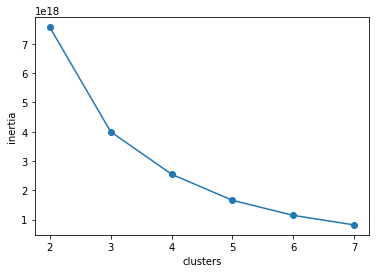

In [9]:
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
clusters=range(2,8)
inertias=[] 
for n in clusters:
    algorithm=KMeans(n_clusters=n,init='k-means++',algorithm='auto',random_state=100)
    algorithm.fit(클러스터링)
    inertias.append(algorithm.inertia_) 

plt.plot(clusters, inertias, '-o')    
plt.ylabel('inertia')
plt.xlabel('clusters')
plt.show()
#엘보우 포인트 확인

In [10]:
from sklearn.cluster import KMeans 
model=KMeans(n_clusters=3) #군집개수 3
model.fit(클러스터링)

KMeans(n_clusters=3)

In [11]:
클러스터링.점포별월매출금액

상권코드명
가로공원로58길      1.435792e+08
가로공원로76가길     1.307519e+08
가로공원로80길      3.455603e+08
가마산로61길       9.130879e+07
가산디지털단지역_1    3.036476e+08
                  ...     
휘경로2길         2.432907e+08
휘경로3길         1.853671e+08
흑석로13길        3.123669e+08
흑석로9길         3.017511e+08
흑석시장          1.235948e+08
Name: 점포별월매출금액, Length: 1244, dtype: float64

In [12]:
클러스터링.유사업종점포수

상권코드명
가로공원로58길       1.00
가로공원로76가길      3.75
가로공원로80길       1.60
가마산로61길        1.60
가산디지털단지역_1    11.60
              ...  
휘경로2길          5.10
휘경로3길          3.65
흑석로13길         1.95
흑석로9길          2.95
흑석시장           3.50
Name: 유사업종점포수, Length: 1244, dtype: float64

In [13]:
클러스터링['분류']=model.predict(클러스터링)

In [14]:
클러스터링['분류'].value_counts()

0    773
1    403
2     68
Name: 분류, dtype: int64

In [19]:
클러스터링.to_csv("c:/data/project/team/revised/클러스터링1.csv",encoding='cp949')

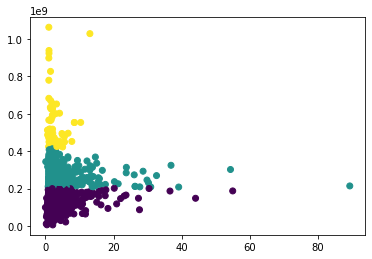

In [16]:
import matplotlib.pyplot as plt 
import numpy as np
colormap=np.array(['red','lime','black'])
plt.scatter(클러스터링.유사업종점포수,클러스터링.점포별월매출금액,c=model.labels_)
plt.show()

In [17]:
# # 클러스터링 시각화
# import matplotlib.pyplot as plt 
# import numpy as np
# colormap=np.array(['red','lime','black'])
# plt.scatter(클러스터링.유사업종점포수,클러스터링.점포별월매출금액,c=colormap[model.predict(클러스터링)])
# plt.show()